### Compare and contrast partition (kmeans) clustering, hierarchical clustering, and DBSCAN (density) clustering. You may refer to SklearnLinks to an external site. for details as there are small differences in algorithms between languages and packages. 


## Data Prep. 

1. Choose a labeled dataset to perform clustering on.
2. Prepare the data by removing the label (and saving it elsewhere for later comparison with the clusters). You may also want to perform clustering on many of your datasets. Remember - the requirements noted here are the minimum requirements, not the max :)
3. Next, continue to prepare the data by assuring that it is quantitative only. 
4. Then, normalize the data so the mean of each column is 0 and the stddev is 1. (I recommend StandardScalar)
5. Next, perform PCA on the normalized data so that you have only 3 dimensions. Include the percentage of variance (information) that is remaining after the reduction to 3D. YES - you can use the dataset from the PCA TAB above if you wish. 

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
filename = "cleaned_dataset.csv"

df = pd.read_csv(filename)

print(df.columns)
print(df.dtypes)

Index(['is_clean', 'product_name', 'brand_name', 'size', 'loves_count',
       'number_of_reviews', 'rating', 'secondary_category',
       'tertiary_category', 'ingredients', 'ingredient_description',
       'limited_edition', 'online_only', 'sephora_exclusive', 'list_price'],
      dtype='object')
is_clean                    int64
product_name               object
brand_name                 object
size                      float64
loves_count                 int64
number_of_reviews           int64
rating                    float64
secondary_category         object
tertiary_category          object
ingredients                object
ingredient_description     object
limited_edition             int64
online_only                 int64
sephora_exclusive           int64
list_price                float64
dtype: object


In [4]:
# selecting numerical data
numerical_columns = ['size', 'loves_count', 'number_of_reviews', 'rating', 'list_price']
numerical_data = df[numerical_columns]
print(numerical_data)

      size  loves_count  number_of_reviews  rating  list_price
0     0.15        22871                397  4.3401        20.0
1     1.00         6596                240  4.6792        32.0
2     0.30         5015                232  4.4310        19.0
3     0.29         4978                103  4.6117        22.0
4     0.14         3685                 19  4.0526        22.0
...    ...          ...                ...     ...         ...
1189  0.30        30837               3024  4.2004        32.0
1190  0.10        23332               1964  4.5229        48.0
1191  0.50        14056                335  4.1910        29.0
1192  1.35        12600                261  4.4904        39.0
1193  0.80         7764                198  4.4949        39.0

[1194 rows x 5 columns]


In [5]:
# normalize/standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

In [6]:
# apply PCA (3 Components)
pca = PCA(n_components=3)
pca_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2','PC3'])

print(pca_df)

           PC1       PC2       PC3
0    -0.459515 -0.368332 -0.346518
1    -0.409670  0.839143 -0.358240
2    -0.564495 -0.233559 -0.369744
3    -0.510445  0.159882 -0.588252
4    -0.856395 -0.653381 -0.082806
...        ...       ...       ...
1189  0.420425 -0.140924 -0.114219
1190  0.184018  1.048245 -0.697979
1191 -0.609298 -0.095266 -0.076803
1192 -0.469626  0.952545 -0.026063
1193 -0.522305  0.852789 -0.315053

[1194 rows x 3 columns]


In [7]:
# exploring variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance) * 100

print("Percentage of variance remaining after reduction to 3D: ", explained_variance[0] + explained_variance[1])

Percentage of variance remaining after reduction to 3D:  0.5680779066193228


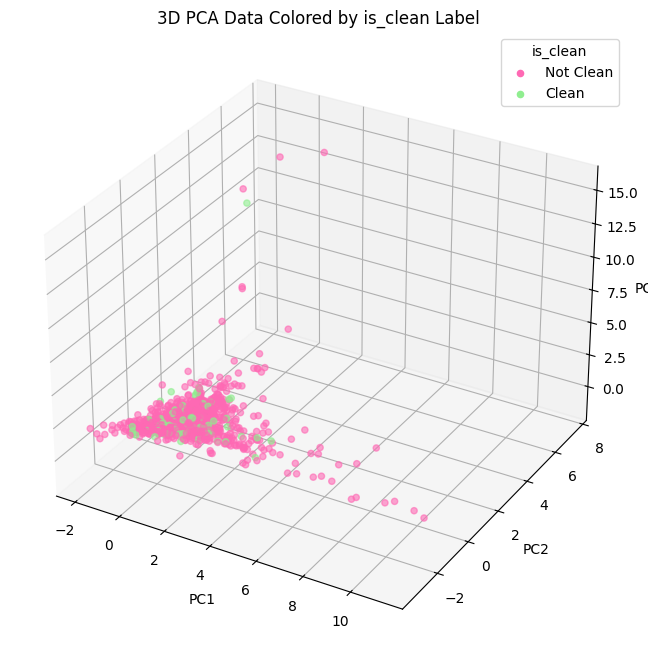

In [8]:
# Clean beauty viualization
pca_df['is_clean'] = df['is_clean'].values  

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


colors = np.where(pca_df['is_clean'] == 1, 'lightgreen', 'hotpink')  # Green for clean, red for not clean


scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], 
                     c=colors, marker='o', s=20, alpha=0.6)


ax.set_title('3D PCA Data Colored by is_clean Label')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

legend_labels = ['Not Clean', 'Clean']
for color, label in zip(['hotpink', 'lightgreen'], legend_labels):
    ax.scatter([], [], [], color=color, label=label)

ax.legend(title='is_clean', loc='upper right')

plt.show()


# KMeans Clustering
Code Kmeans clustering on your 3D data. Code and use the results from the Silhouette Method. to choose three smart values of k to cluster with. Plot the 3D data AND include on the plot the kmeans centroids. So, if you have three values of k you will have three different plots. Use color for the original labels. Compare and discuss what the results mean. 

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

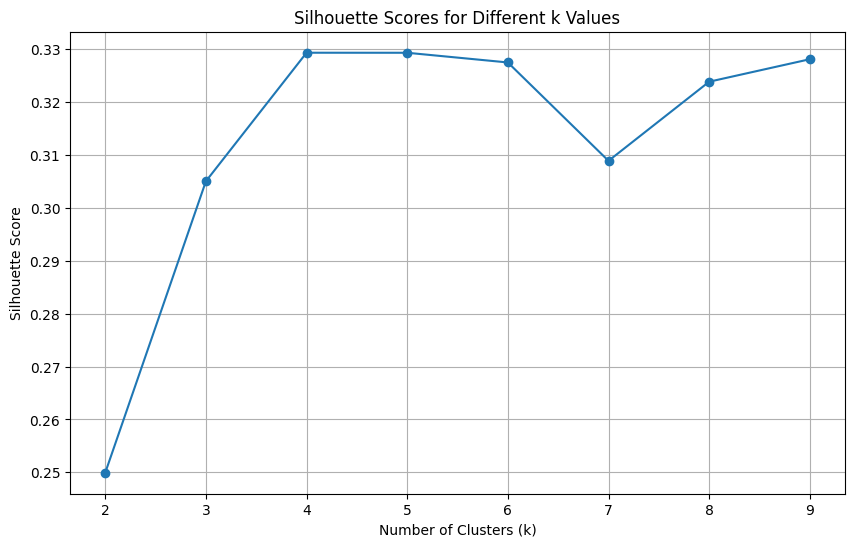

(1194, 4)


In [10]:

X = df.values 

silhouette_scores = []

k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    score = silhouette_score(pca_df, kmeans.labels_)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.show()

print(pca_df.shape)  # Should return (n_samples, 3)

/var/folders/wf/94gp6c491j1frd1mbhkvm29c0000gn/T/ipykernel_68934/956156596.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', k)(labels)  # Use a colormap with k colors


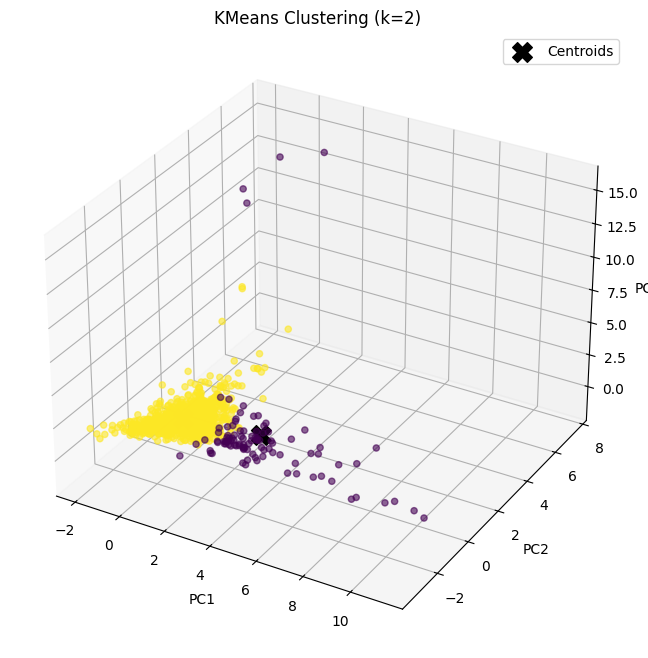

/var/folders/wf/94gp6c491j1frd1mbhkvm29c0000gn/T/ipykernel_68934/956156596.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', k)(labels)  # Use a colormap with k colors


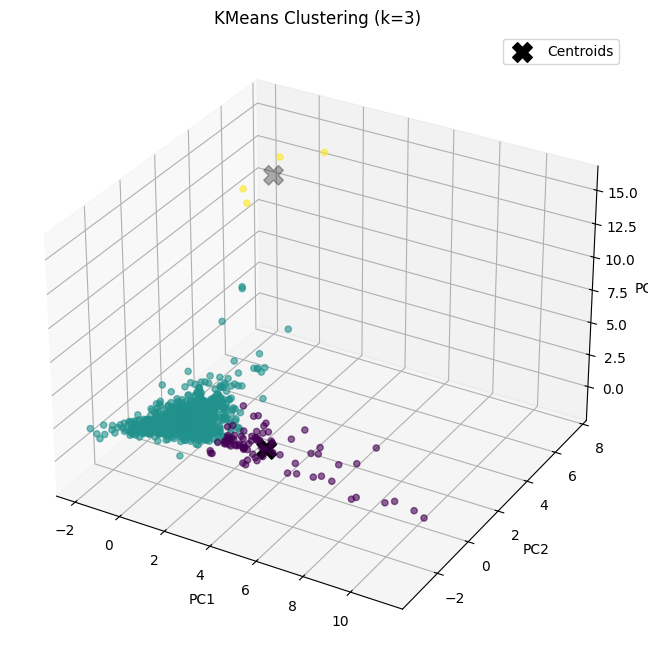

/var/folders/wf/94gp6c491j1frd1mbhkvm29c0000gn/T/ipykernel_68934/956156596.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', k)(labels)  # Use a colormap with k colors


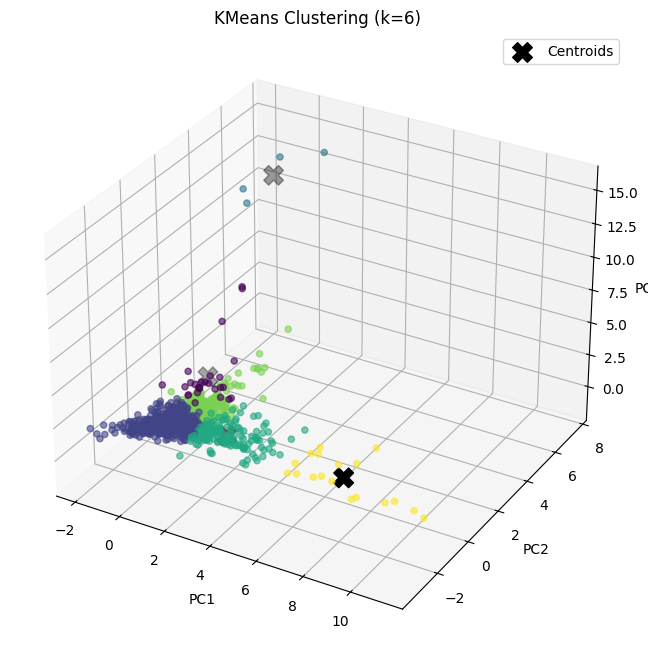

In [11]:
from sklearn.cluster import KMeans

pca_df['is_clean'] = df['is_clean'].values 

optimal_k_values = [2, 3, 6]

for k in optimal_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df[['PC1', 'PC2', 'PC3']])

    # cluster labels and centroids
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # KMeans labels for coloring the clusters
    colors = plt.cm.get_cmap('viridis', k)(labels)  # Use a colormap with k colors

    scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], 
                         c=colors, marker='o', s=20, alpha=0.6)

    # plot centroids
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
               c='black', s=200, marker='X', label='Centroids')
    
    ax.set_title(f'KMeans Clustering (k={k})')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.legend()
    
    plt.show()


For 
𝑘
=
3
k=3: You may see well-separated clusters if your data naturally forms three groups.
For 
𝑘
=
4
k=4: This may reveal additional structure or lead to smaller clusters.
For 
𝑘
=
5
k=5: Further segmentation might highlight more distinct groups but could also result in overlaps.


When analyzing the plots:
Observe how well the clusters correspond to the clean and non-clean labels.
Determine if the clustering aligns with your expectations based on the is_clean labels.
Consider if the clusters separate the two classes effectively, indicating that KMeans clustering has captured meaningful patterns in the data.

KMeans: Assumes spherical clusters and requires the number of clusters (k) to be defined in advance. This can lead to suboptimal results if the actual cluster shapes are not spherical.

KMeans: Generates flat clusters without hierarchical relationships. It provides a hard assignment of points to clusters.

# Hierarchical Clustering

Code Hierarchical Clustering on the 3D dataset and illustrate the results with a dendrogram. You may use any Python-related method to do this and you can use any type of hierarchical clustering you wish as long as you explain what you used. (Options include things like Plotly, scipy, etc. ). How would you compare the dendrogram results to the kmeans results?

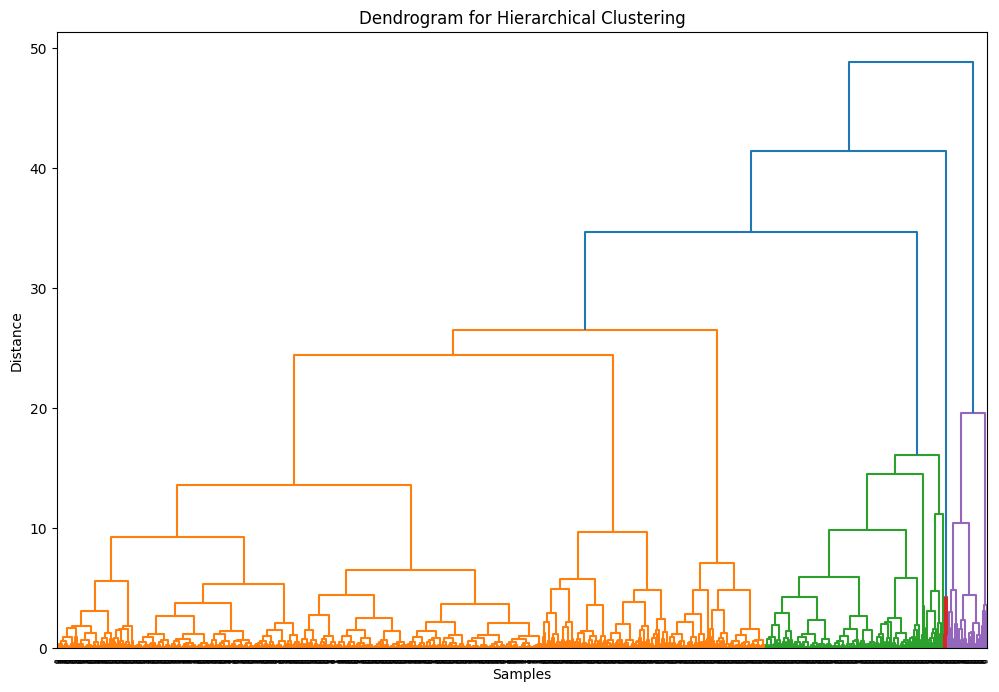

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
pca_heir = pca_df[['PC1', 'PC2', 'PC3']]

# distance matrix and perform hierarchical clustering
linked = linkage(pca_heir, method='ward')  # Using Ward's method

# dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked,
           orientation='top',
           labels=pca_df['is_clean'].values,  # Optionally show labels
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [16]:
pd.crosstab(comparison_df['is_clean'], comparison_df['cluster'])

cluster,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
is_clean,,,,,,,,,,,,,,,,
0,7,28,13,3,3,18,7,56,127,66,47,68,72,236,165,85
1,0,3,0,1,0,4,0,1,13,6,5,13,10,75,48,14


# DB Scan (Density) Clustering
Code DBSCAN using Python. How do these results compare to your other clustering results?

Steps to Perform DBSCAN:
Import necessary libraries.
Standardize the data (optional, but usually recommended).
Fit the DBSCAN model using parameters like eps (the maximum distance between two samples for them to be considered as in the same neighborhood) and min_samples (the number of samples in a neighborhood for a point to be considered as a core point).
Visualize the clusters.


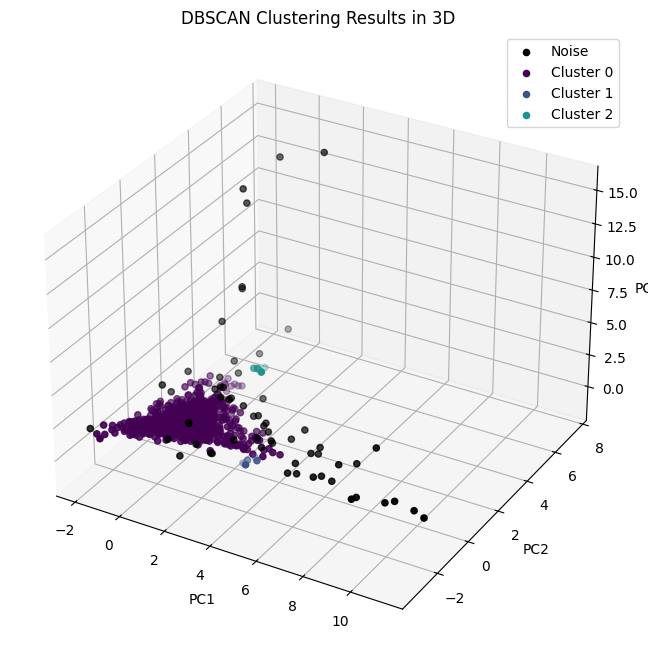

In [17]:
from sklearn.cluster import DBSCAN

pca_dB = pca_df[['PC1', 'PC2', 'PC3']]

# DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=3)  # Adjust parameters as needed
clusters = dbscan.fit_predict(pca_dB)

pca_df['DBSCAN_Cluster'] = clusters

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

unique_labels = np.unique(clusters)
for label in unique_labels:
    if label == -1:  # Noise points
        color = 'k'  # Black color for noise
        marker = 'o' 
    else:
        color = plt.cm.viridis(label / len(unique_labels))  
        marker = 'o'  
    ax.scatter(pca_df[pca_df['DBSCAN_Cluster'] == label]['PC1'],
               pca_df[pca_df['DBSCAN_Cluster'] == label]['PC2'],
               pca_df[pca_df['DBSCAN_Cluster'] == label]['PC3'],
               label=f'Cluster {label}' if label != -1 else 'Noise',
               color=color, marker=marker)

ax.set_title('DBSCAN Clustering Results in 3D')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()

plt.show()